In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step


[9]


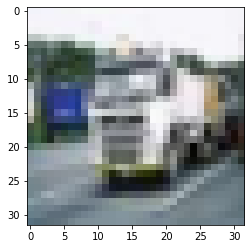

In [3]:
i = 1000
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


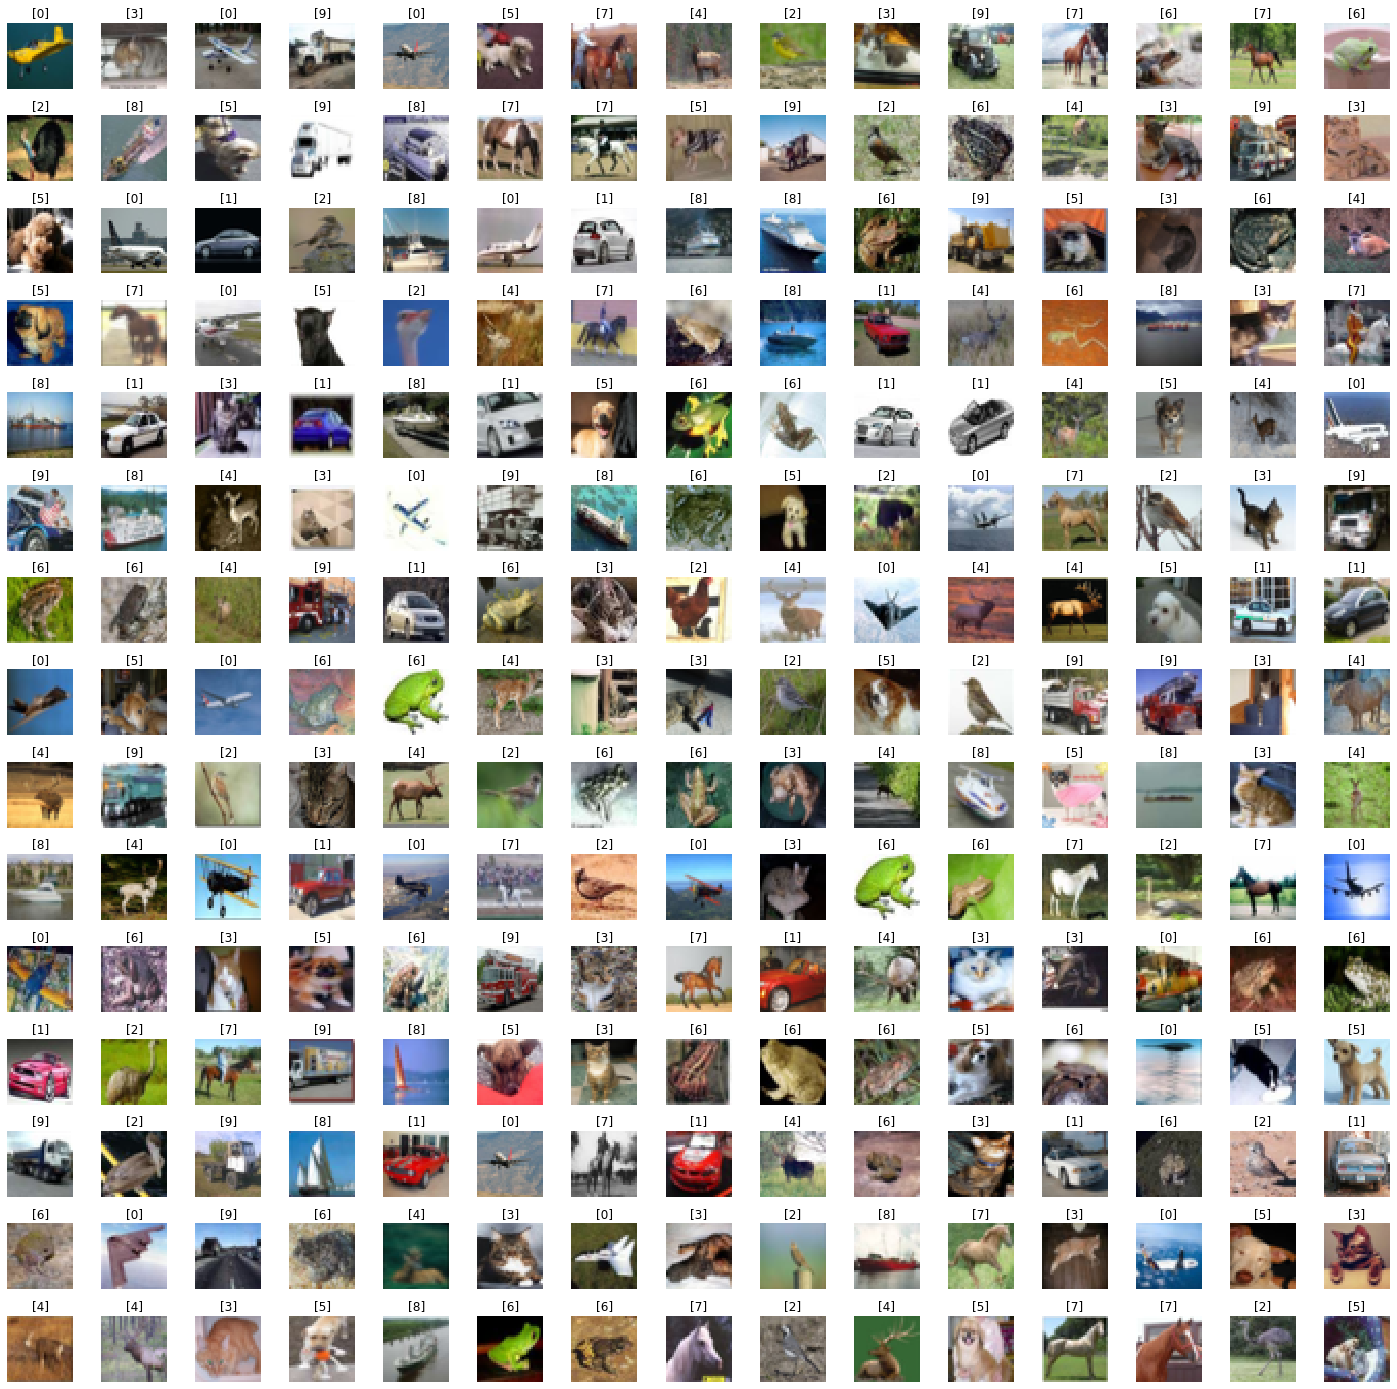

In [4]:
w_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)
for i in np.arange(0, L_grid * w_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


In [0]:
number_cat = 10

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [10]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [13]:
X_train

array([[[[ 59.,  62.,  63.],
         [ 43.,  46.,  45.],
         [ 50.,  48.,  43.],
         ...,
         [158., 132., 108.],
         [152., 125., 102.],
         [148., 124., 103.]],

        [[ 16.,  20.,  20.],
         [  0.,   0.,   0.],
         [ 18.,   8.,   0.],
         ...,
         [123.,  88.,  55.],
         [119.,  83.,  50.],
         [122.,  87.,  57.]],

        [[ 25.,  24.,  21.],
         [ 16.,   7.,   0.],
         [ 49.,  27.,   8.],
         ...,
         [118.,  84.,  50.],
         [120.,  84.,  50.],
         [109.,  73.,  42.]],

        ...,

        [[208., 170.,  96.],
         [201., 153.,  34.],
         [198., 161.,  26.],
         ...,
         [160., 133.,  70.],
         [ 56.,  31.,   7.],
         [ 53.,  34.,  20.]],

        [[180., 139.,  96.],
         [173., 123.,  42.],
         [186., 144.,  30.],
         ...,
         [184., 148.,  94.],
         [ 97.,  62.,  34.],
         [ 83.,  53.,  34.]],

        [[177., 144., 116.],
       

In [0]:
X_train = X_train / 255
X_test = X_test / 255

In [0]:
Input_shape = X_train.shape[1:]

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

In [0]:
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(number_cat, activation = 'softmax'))

In [20]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001), metrics=['accuracy'])

In [21]:
history = cnn_model.fit(X_train, y_train, batch_size= 32, epochs = 2, shuffle=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/2





50000/50000 [==============================] - 213s 4ms/step - loss: 1.5953 - acc: 0.4251
Epoch 2/2
50000/50000 [==============================] - 212s 4ms/step - loss: 1.1883 - acc: 0.5871


In [24]:
evaluation = cnn_model.evaluate(X_test, y_test)

10000/10000 [==============================] - 11s 1ms/step


In [25]:
print('test accuracy : {}'.format(evaluation[1]))

test accuracy : 0.6322


In [26]:
predicted_class = cnn_model.predict_classes(X_test)
predicted_class

array([3, 8, 8, ..., 5, 4, 7])

In [0]:
y_test = y_test.argmax(1)

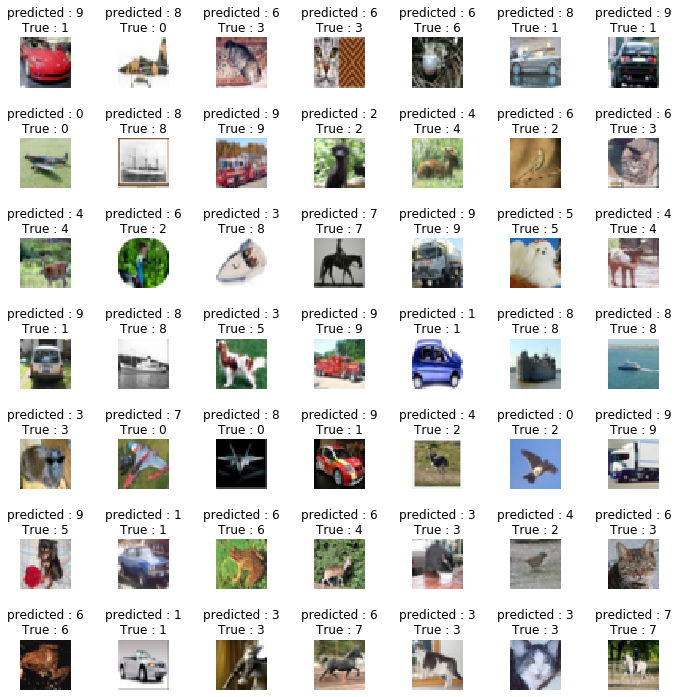

In [29]:
w_grid = 7
L_grid = 7
fig, axes = plt.subplots(L_grid, w_grid, figsize = (12, 12))
axes = axes.ravel()

n_training = len(X_test)
for i in np.arange(0, L_grid * w_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_test[index])
  axes[i].set_title('predicted : {}\nTrue : {}'.format(predicted_class[index],y_test[index]))
  axes[i].axis('off')

plt.subplots_adjust(hspace = 1)

In [30]:
from sklearn.metrics import  confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_class)
cm

array([[570,  25,  33,  37,  24,   1,  18,  14, 199,  79],
       [  3, 741,   4,   9,   4,   0,  17,   6,  50, 166],
       [ 60,   4, 346, 179, 135,  22, 153,  39,  38,  24],
       [ 17,   9,  29, 568,  86,  38, 152,  39,  23,  39],
       [ 15,   1,  33,  88, 612,   3, 131,  98,  12,   7],
       [  7,   3,  27, 420,  60, 272,  79,  94,  13,  25],
       [  2,   1,  18,  64,  42,   1, 842,   8,   8,  14],
       [  5,   5,  15,  98,  82,  15,  33, 692,   5,  50],
       [ 32,  23,   7,  29,   8,   0,  17,   3, 842,  39],
       [ 11,  56,   2,  22,   8,   0,  21,   5,  38, 837]])

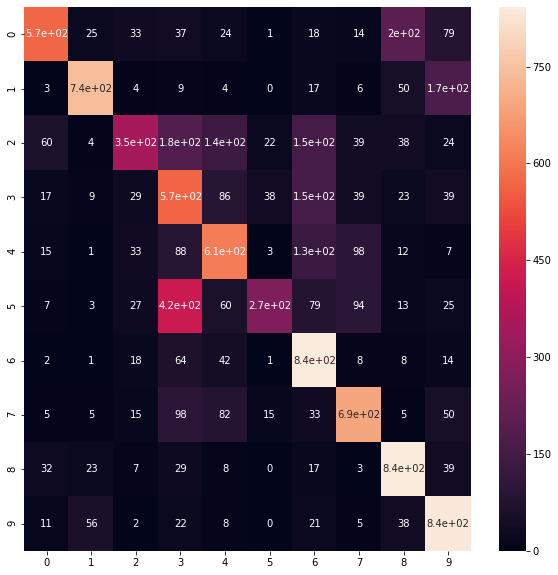

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot= True)